<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task5/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

# Mengatur path file
file_path = '/content/drive/MyDrive/Dataset/data.csv'



In [8]:
# Membaca dataset sebagai DataFrame
data = pd.read_csv(file_path)
df = pd.read_csv(file_path)

In [7]:
# Import library yang diperlukan untuk EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load dataset using the correct file path from previous cell
data_df = pd.read_csv(file_path) # Gunakan variabel file_path yang telah didefinisikan sebelumnya

In [11]:
# Menampilkan beberapa baris pertama untuk memahami struktur data
data_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [12]:
# Check the dataset's basic information
data_df.info()  # Menampilkan nama kolom, jumlah data non-null, dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [13]:
# Summary statistics for numerical columns
data_df.describe()  # Menyediakan nilai mean, std, min, max, dan kuartil untuk kolom numerik


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [14]:
# Check for missing values
missing_values = data_df.isnull().sum()  #  Menghitung jumlah nilai null di setiap kolom
print("Missing Values:\n", missing_values)

# ... (rest of the code remains the same)

Missing Values:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


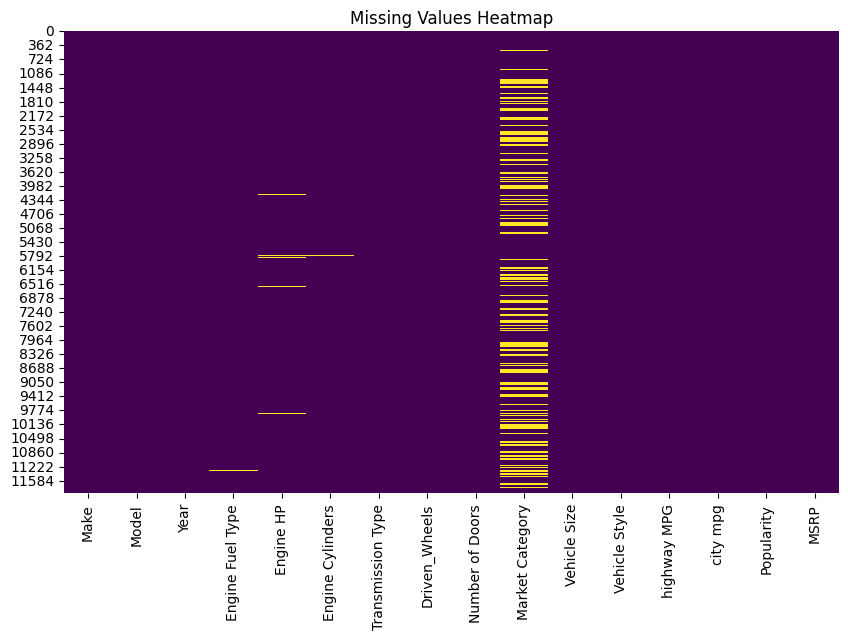

In [15]:
# Plotting missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


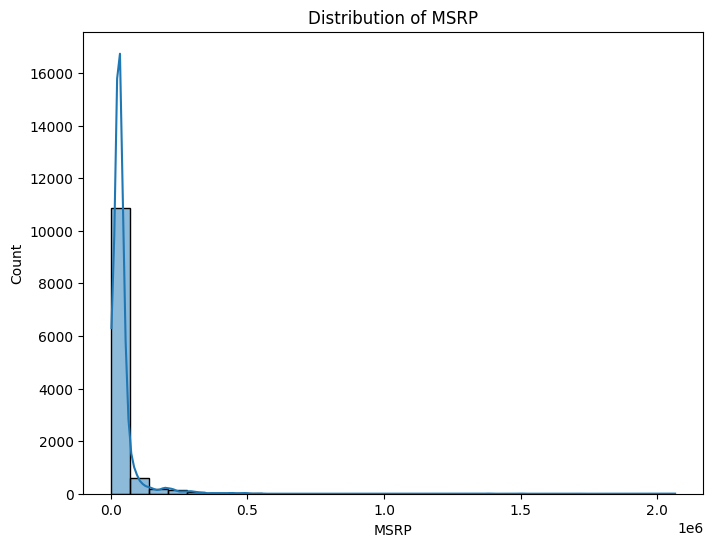

In [16]:
# Univariate Analysis

# Histogram of 'MSRP' (target variable)
plt.figure(figsize=(8, 6))
sns.histplot(data_df['MSRP'], bins=30, kde=True)
plt.title("Distribution of MSRP")
plt.xlabel("MSRP")
plt.show()

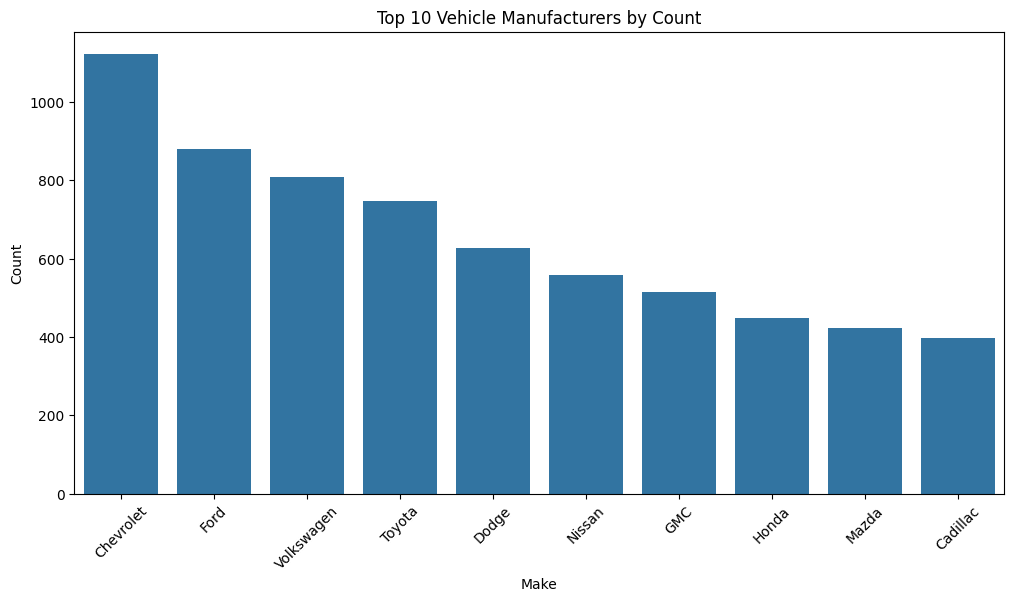

In [17]:
# Categorical analysis: Jumlah 'Make' (10 produsen teratas berdasarkan jumlah)
plt.figure(figsize=(12, 6))
top_makes = data_df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Top 10 Vehicle Manufacturers by Count")
plt.ylabel("Count")
plt.xlabel("Make")
plt.xticks(rotation=45)
plt.show()


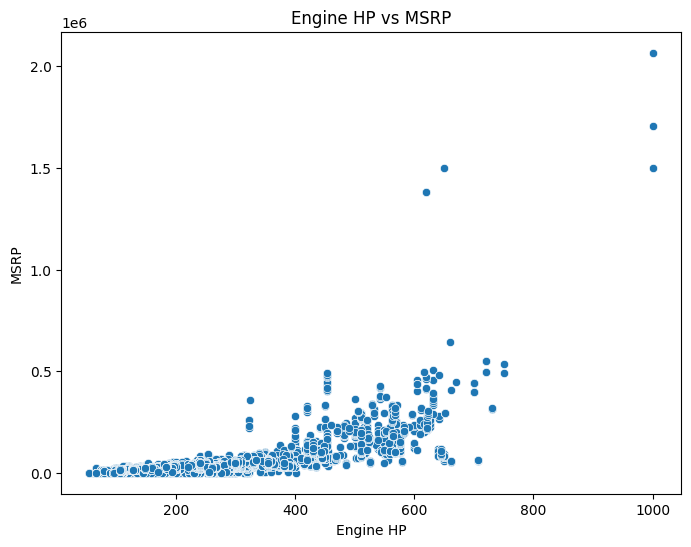

In [18]:
# Bivariate Analysis

# Scatter plot untuk memvisualisasikan hubungan antara Engine HP dan MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine HP', y='MSRP', data=data_df)
plt.title("Engine HP vs MSRP")
plt.xlabel("Engine HP")
plt.ylabel("MSRP")
plt.show()

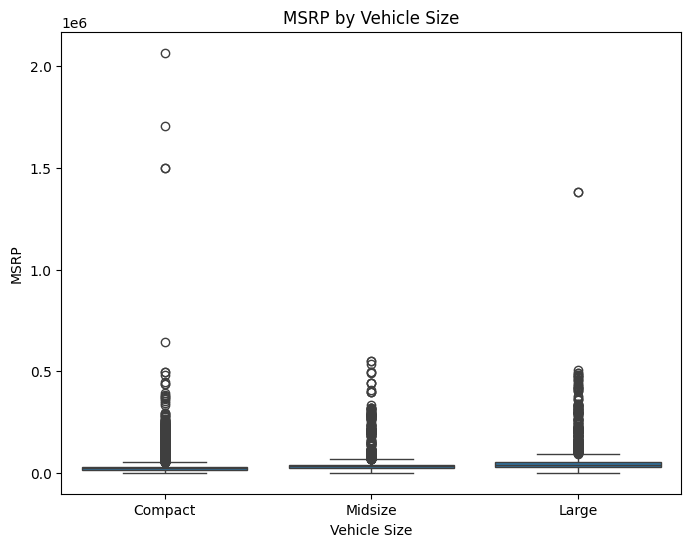

In [19]:
# Box plot dari MSRP berdasarkan Ukuran Kendaraan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Vehicle Size', y='MSRP', data=data_df)
plt.title("MSRP by Vehicle Size")
plt.xlabel("Vehicle Size")
plt.ylabel("MSRP")
plt.show()

In [20]:
# Correlation Analysis


# Calculate correlation matrix for numerical features only
numeric_df = data_df.select_dtypes(include=[np.number])  # Memilih hanya kolom numerik
correlation_matrix = numeric_df.corr()  # Menghitung matriks korelasi

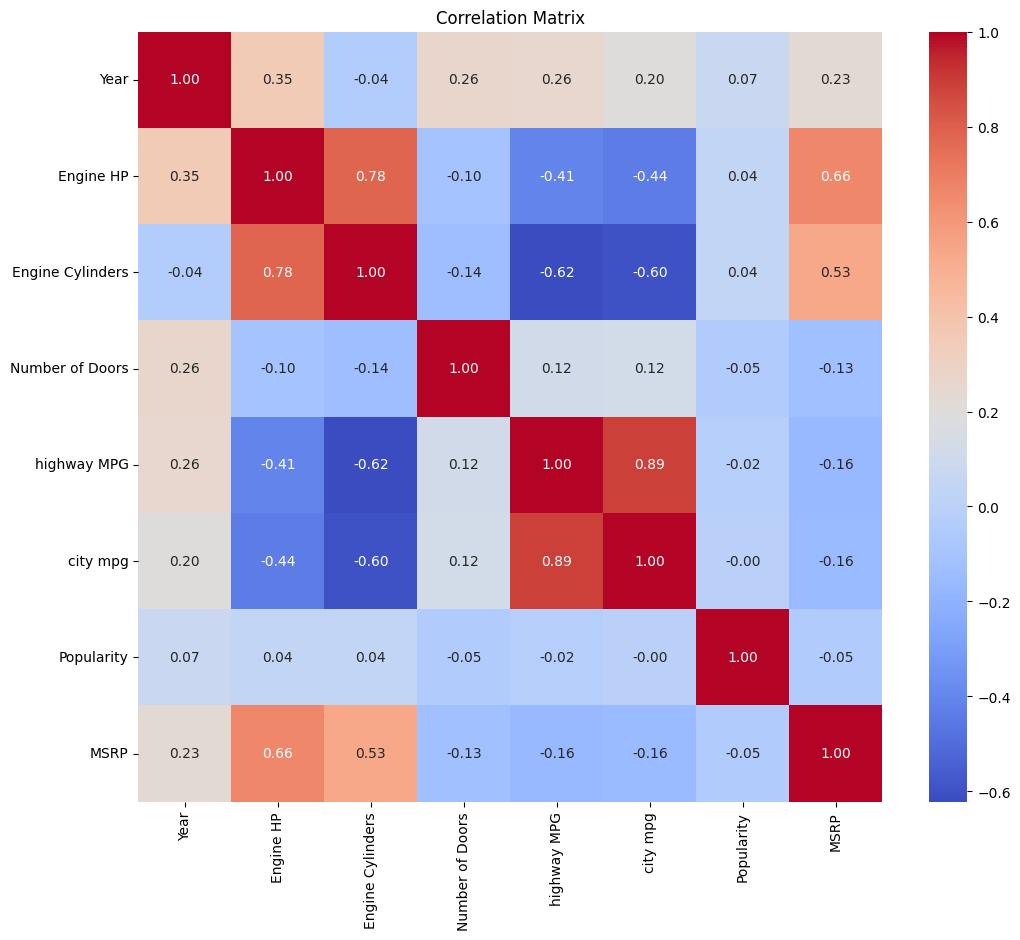

In [21]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

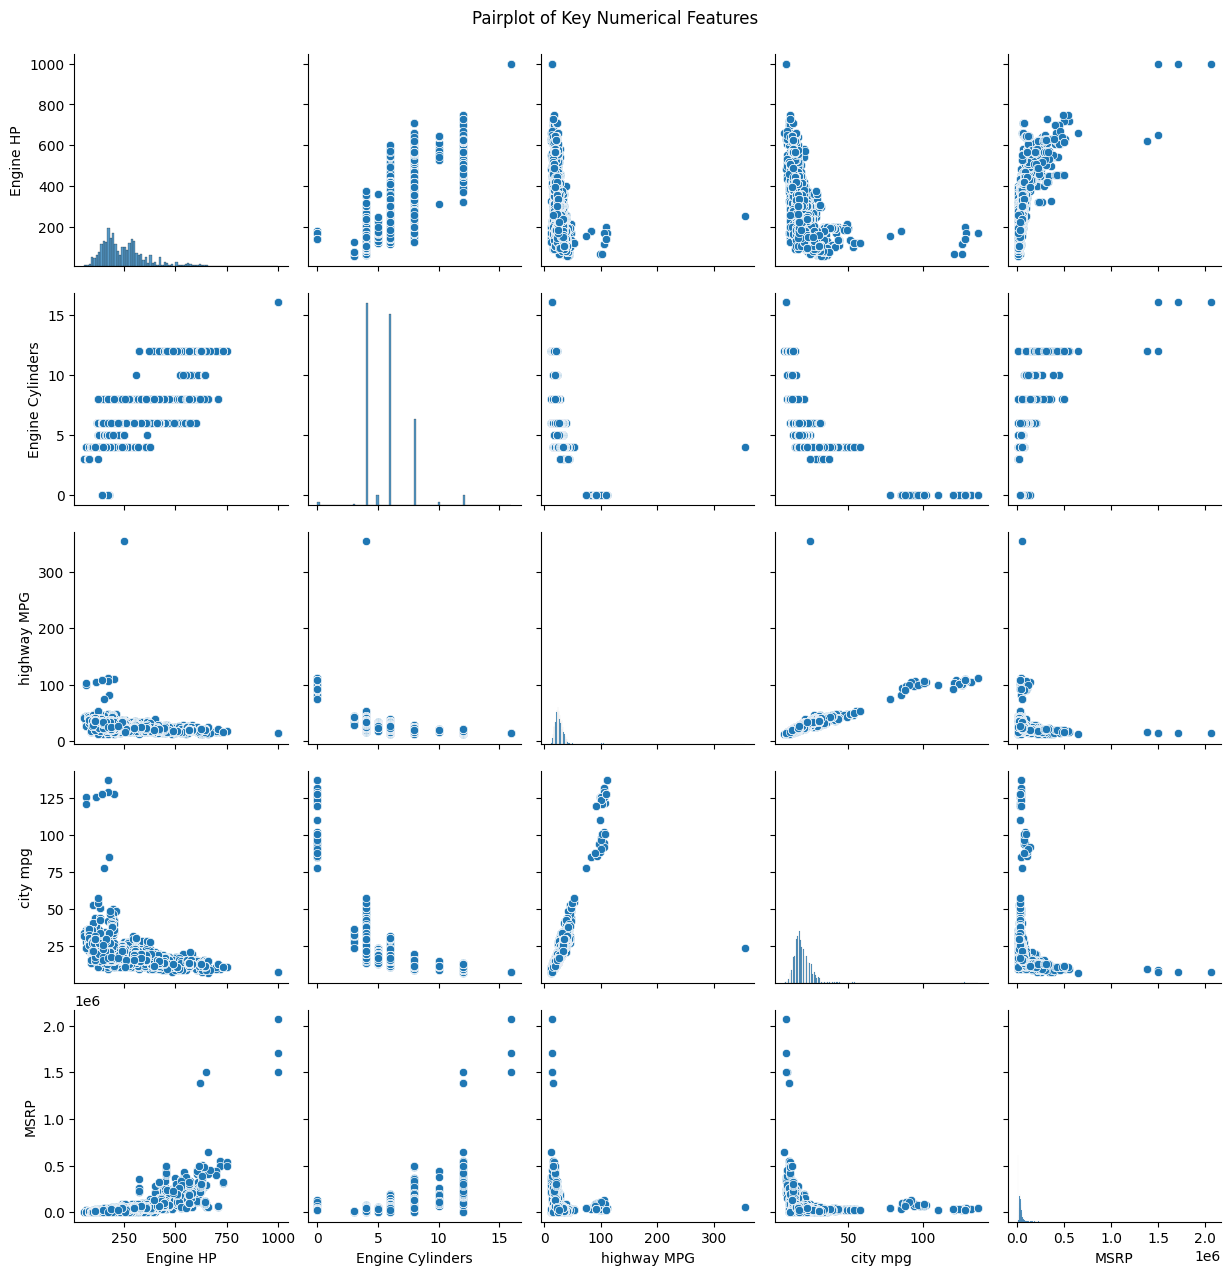

In [23]:
# Multivariate Analysis: Pairplot
sns.pairplot(data_df[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()